# Welcome to my Weather Analysis!

This is a data analysis project on climate data taken from https://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND , featuring an attempts to answer various climate-related questions. I completed a similar project (titled 'California Weather DV'). However, this project is far more in-depth, and incoporates more advanced python techniques and libraries. In this project, I will answer challenge questions from the standpoint of a Meteorological Data Analyst. Enjoy!

Credit: Ideas and challenges by Michele Vallisneri, Theoretical Astrophysicist at NASA and Instructor on LinkedIn learning's "Python Data Analysis" course.

In [101]:
import math
import collections
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# How to read the below analysis report

From here and below, the analysis will be split into three sections, 'Explanation', 'Example', and 'Analysis'. 

The 'Explanation' and 'Example' sections will show the methods I take to plot the data. The 'Analysis' section will contain my interpretation of the data.

## I. Explanation

### After importing the dependencies, retrieve the text files that hold the data I need

In [102]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt', 'data/readme.txt')

('data/readme.txt', <http.client.HTTPMessage at 0x11c9aca50>)

In [103]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt', 'data/stations.txt')

('data/stations.txt', <http.client.HTTPMessage at 0x11cb4e550>)

In [104]:
stations = np.genfromtxt('data/stations.txt', delimiter=[11,9,10,7,3,31,4,4,6],
                                         names=['id','latitude','longitude','elevation','state','name',
                                                'gsn','hcn','wmo'],
                                         dtype=['U11','d','d','d','U3','U31','U4','U4','U6'],
                                         autostrip=True)

### Above, I reformatted the data using NumPy's .genfromtext feature

In [105]:
len(stations)

115082

### This dataset contains over 115,000 data entries

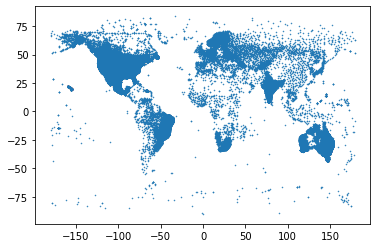

In [106]:
plt.plot(stations['longitude'], stations['latitude'], '.', markersize=1)

### The chart above is a quick snapshot of the station locations. As we can see, the data we retrieve from the website extends globally.

# I want to start narrowing my searches down to states and cities. Below is an example of Pasadena (CA), New York City (NY), and San Antonio (TX).

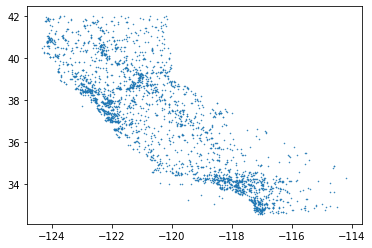

In [107]:
stations_ca = stations[stations['state'] == 'CA']
plt.plot(stations_ca['longitude'], stations_ca['latitude'], '.', markersize=1)

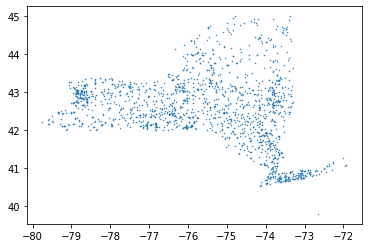

In [108]:
stations_ny = stations[stations['state'] == 'NY']
plt.plot(stations_ny['longitude'], stations_ny['latitude'], '.', markersize=1)

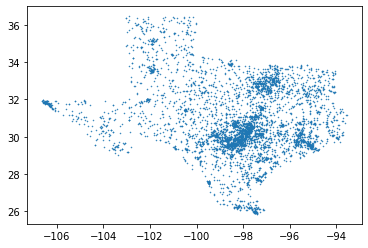

In [109]:
stations_tx = stations[stations['state'] == 'TX']
plt.plot(stations_tx['longitude'], stations_tx['latitude'], '.', markersize=1)

### The above shows the station locations at the three states. 

However, I would like readings on specific cities. This can be accomplished by finding the specific station located at the city.

In [110]:
stations[np.char.find(stations['name'], 'NEW YORK') == 0]

array([('US1NYNY0074', 40.7969, -73.933 ,   6.1, 'NY', 'NEW YORK 8.8 N', '', '', ''),
       ('USC00215902', 46.5233, -95.3847, 428.5, 'MN', 'NEW YORK MILLS', '', '', ''),
       ('USC00305798', 40.6   , -73.9667,   6.1, 'NY', 'NEW YORK BENSONHURST', '', '', ''),
       ('USC00305799', 40.8667, -73.8833,  27.1, 'NY', 'NEW YORK BOTANICAL GRD', '', '', ''),
       ('USC00305804', 40.7333, -73.9333,   3. , 'NY', 'NEW YORK LAUREL HILL', '', '', ''),
       ('USC00305806', 40.85  , -73.9167,  54.9, 'NY', 'NEW YORK UNIV ST', '', '', ''),
       ('USC00305816', 40.7   , -74.0167,   3. , 'NY', 'NEW YORK WB CITY', '', '', ''),
       ('USW00014732', 40.7794, -73.8803,   3.4, 'NY', 'NEW YORK LAGUARDIA AP', '', '', '72503'),
       ('USW00014786', 40.5833, -73.8833,   4.9, 'NY', 'NEW YORK FLOYD BENNETT FLD', '', '', ''),
       ('USW00093732', 39.8   , -72.6667,  25.9, 'NY', 'NEW YORK SHOALS AFS', '', '', ''),
       ('USW00094728', 40.7789, -73.9692,  39.6, 'NY', 'NEW YORK CNTRL PK TWR', '', 'HC

In [111]:
stations[np.char.find(stations['name'], 'PASADENA') == 0]

array([('CA1NL000026', 49.0094,  -57.5849,  52.4, 'NL', 'PASADENA 0.5 SE', '', '', ''),
       ('US1CALA0036', 34.1392, -118.1161, 225.2, 'CA', 'PASADENA 2.0 SE', '', '', ''),
       ('US1CALA0043', 34.1619, -118.1073, 277.7, 'CA', 'PASADENA 1.8 E', '', '', ''),
       ('US1CALA0091', 34.1648, -118.1249, 289. , 'CA', 'PASADENA 0.8 ENE', '', '', ''),
       ('US1MDAA0010', 39.1038,  -76.5443,  13.1, 'MD', 'PASADENA 0.7 SE', '', '', ''),
       ('US1MDAA0013', 39.1263,  -76.5596,  18.9, 'MD', 'PASADENA 1.1 NNW', '', '', ''),
       ('US1MDAA0039', 39.0916,  -76.5112,  10.7, 'MD', 'PASADENA 2.6 ESE', '', '', ''),
       ('US1TXHRR076', 29.6471,  -95.1895,  10.7, 'TX', 'PASADENA 2.4 WSW', '', '', ''),
       ('US1TXHRR084', 29.6339,  -95.1881,  11.9, 'TX', 'PASADENA 2.8 SW', '', '', ''),
       ('US1TXHRR093', 29.6849,  -95.2197,   9.1, 'TX', 'PASADENA 4.4 WNW', '', '', ''),
       ('US1TXHRR094', 29.6746,  -95.2104,   9.1, 'TX', 'PASADENA 3.6 WNW', '', '', ''),
       ('USC00046719', 34.1

In [112]:
stations[np.char.find(stations['name'], 'SAN ANTONIO') == 0]

array([('ARM00087784', -40.783 ,  -65.1   ,   20. , '', 'SAN ANTONIO OESTE AERO', '', '', '87784'),
       ('MXN00003049',  23.8   , -110.05  ,  399.9, '', 'SAN ANTONIO SUR', '', '', ''),
       ('MXN00003126',  26.5167, -112.5   ,  159.7, '', 'SAN ANTONIO DE LA SIERRA', '', '', ''),
       ('MXN00003133',  26.1333, -111.45  ,  100. , '', 'SAN ANTONIO NORTE', '', '', ''),
       ('MXN00005035',  25.2667, -100.5667, 2179.9, '', 'SAN ANTONIO LAS ALAZANAS (DGE', '', '', ''),
       ('MXN00005049',  25.2833, -100.6167, 2299.7, '', 'SAN ANTONIO LAS ALAZANAS (SMN', '', '', ''),
       ('MXN00007142',  16.55  ,  -93.4333,  812. , '', 'SAN ANTONIO', '', '', ''),
       ('MXN00008122',  29.0833, -106.25  , 1529.8, '', 'SAN ANTONIO', '', '', ''),
       ('MXN00010062',  26.4333, -105.35  , 1654.8, '', 'SAN ANTONIO', '', '', ''),
       ('MXN00011062',  21.4   , -100.3833, 2279.9, '', 'SAN ANTONIO DE LOS MARTINEZ', '', '', ''),
       ('MXN00012140',  17.7167, -100.8667, 1899.8, '', 'SAN ANTONIO 

### Although there are several stations we can choose to gather data, I want the data from the quality-controlled HCN (Historical Climatology Network) database. This will ensure that I have the measurements I need to perform the analysis.

According to the searches above, I would be using the below stations:

Pasadena, CA = USC00046719 | New York City, New York = USW00094728 | San Antonio, Texas = USW00012921

In [113]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/USC00046719.dly', 'data/PASADENA.dly')

('data/PASADENA.dly', <http.client.HTTPMessage at 0x12a6b7cd0>)

In [114]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/USW00094728.dly', 'data/NEWYORK.dly')

('data/NEWYORK.dly', <http.client.HTTPMessage at 0x12a69f890>)

In [115]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/USW00012921.dly', 'data/TEXAS.dly')

('data/TEXAS.dly', <http.client.HTTPMessage at 0x12a6825d0>)

In [116]:
import getweather

## II. Example: Pasadena, CA

Before jumping into the analysis, I want to show the steps that I take to plot the charts. This will show you what methods I take to validate the data, and express it in a meaningful way.

Below I start gathering the data of Pasadena's climates, and create a simple plot to see the maximum temperatures recorded at Pasadena for 2019.

In [117]:
pasadena = getweather.getyear('PASADENA', ['TMIN','TMAX'], 2019)

In [118]:
np.mean(pasadena['TMAX']), np.min(pasadena['TMAX']), np.max(pasadena['TMAX'])

(24.971780821917804, 10.0, 38.3)

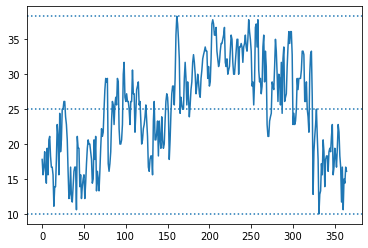

In [119]:
plt.plot(pasadena['TMAX'])

for value in [np.mean(pasadena['TMAX']), np.min(pasadena['TMAX']), np.max(pasadena['TMAX'])]:
    plt.axhline(value, linestyle=':')

### In its most simplest form, this graph shows the maximum temperatures throughout all 365 days at the Pasadena station. 

According to the graph, the temperature increases around the late 100's to early 300's. This can seem obvious due to summer temperatures.

In [120]:
rain = getweather.getyear('PASADENA', ['PRCP'], 2019)['PRCP']

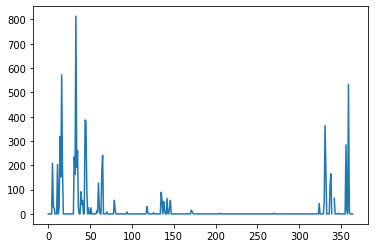

In [121]:
plt.plot(rain)

### I wanted to see how much precipitation Pasadena experienced throughout the year. This simple graph shows that Pasadena mainly experiences some form of precipitation during the Winter.

Unfortunately, the chart(s) shown above have a large variance because the changes is temperature can vary greatly after each day. This causes noise in the dataset that can offset trends. To remedy this, I normalize the values so that the array values sum to 1.

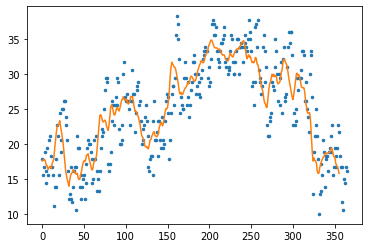

In [122]:
plt.plot(pasadena['TMAX'], '.', ms=5)
plt.plot(np.correlate(pasadena['TMAX'], np.ones(10)/10, 'valid'))

### The above graph shows the original maximum temperatures chart in small dots. However, this time I added in a correlated orange line that shows the values of a normalized set of arrays. In other words, the orange line indicates the 'validated' temperatures throughout those days, thereby showing a 'trend'.

In [123]:
# This is standard lines of code that can smooth out arrays

def smooth(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window)/window, mode)

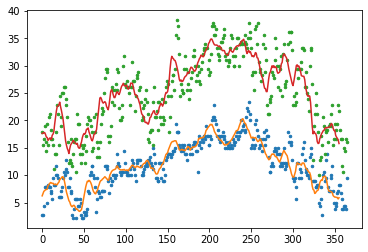

In [124]:
plt.plot(pasadena['TMIN'], '.', ms=5)
plt.plot(smooth(pasadena['TMIN'], 10))

plt.plot(pasadena['TMAX'], '.', ms=5)
plt.plot(smooth(pasadena['TMAX'], 10))

### This chart shows the maximum and minimum temperatures of Pasadena in 2019.

Now that I've shown the in-depth methods of how I extract, plot, and smooth the data, I can combine these methods into functions that can be applied to multiple stations.

# Analysis: California Weather Patterns

Now that I've gathered the data and visualized it in a meaningful way, I can create functions to apply the same methods to multiple cities.

I will be using the 'smooth' function above, the 'plotsmooth' function below, and the 'fillnans' function to remove any NaN values.

In [125]:
def plotsmooth(station, year):
    stationdata = getweather.getyear(station, ['TMIN','TMAX'], year)

    for obs in ['TMIN','TMAX']:   
        stationdata[obs] = fillnans(stationdata[obs])
    
        # thinner points
        plt.plot(stationdata[obs], '.', ms=1)
        plt.plot(range(10,356), smooth(stationdata[obs], 20))
    
    plt.title(station)
    plt.axis(xmin=1, xmax=365, ymin=-10, ymax=45)

In [126]:
def fillnans(array):
    x = np.arange(len(array))
    good = ~np.isnan(array)

    return np.interp(x, x[good], array[good])

(1.0, 365.0, 0, 40)

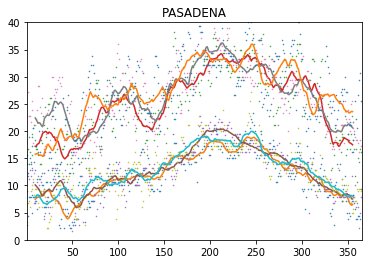

In [127]:
plotsmooth('PASADENA', 2019)
plotsmooth('PASADENA', 2018)
plotsmooth('PASADENA', 2017)

plt.axis(ymin=0,ymax=40)